# Lab 0: PyTorch Primer

We'll use Python and [PyTorch](https://pytorch.org/) for the labs in this course. This lab is to help you get up to speed. It will introduce:
- **Tensors**: PyTorch's equivalent of NumPy arrays, but with more bells and whistles for running on GPUs and supporting automatic differentiation.
- **Broadcasting and Fancy Indexing**: If you're coming from Matlab or NumPy, you probably know that you can avoid costly for-loops by broadcasting computation over dimensions of an array (here, tensor) and using fancy indexing tricks. 
- **Distributions**: PyTorch has an excellent library of distributions for sampling, evaluating log probabilities, and much more. 

We'll introduce these concepts in the context of the Poisson mixture model from class (c.f. [Probabilistic Modeling](../lectures/02_probabilistic_modeling.ipynb)).

In [2]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

## 1. Constructing Tensors

Tensors are PyTorch's equivalent of NumPy arrays. The PyTorch documentation already has a [great tutorial](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) on tensors. Rather than recreate the wheel, please start by reading that.

Once you've read through that, try using torch functions like `arange`, `reshape`, etc. to construct the following tensors.

### Problem 1.1

Construct the following tensor:

```
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
```

_Note: For this problems and the ones below, don't literally construct the tensor from the specified list. Use torch functions._

---

In [ ]:
# YOUR CODE HERE

data = torch.arange(9)
data = torch.reshape(data, (3,3))
print(data)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


### Problem 1.2

Construct the following tensor:

```
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

---

In [ ]:
# YOUR CODE HERE

data = torch.arange(9)
data = torch.reshape(data, (3,3))
data = torch.transpose(data, 0, 1)
print(data)

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])


### Problem 1.3

Construct the following tensor:

```
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
```

_Note: Here the sequence is repeated 3 times. Does your code support arbitrary numbers of repeats?_

---

In [ ]:
# YOUR CODE HERE

nRepeats = 3
data = torch.arange(5)
data = data.repeat(1,nRepeats)
print(data)

tensor([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])


### Problem 1.4

Construct the following tensor:

```
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])
```

---

In [ ]:
# YOUR CODE HERE

nRepeats = 3
data = torch.arange(5)
data = data.repeat(nRepeats,1)
print(data)

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])


### Problem 1.5

Construct the following tensor:

```
tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])
```

---

In [ ]:
# YOUR CODE HERE

data = torch.eye(4)
torch.diagonal(data, offset=1)[...] = -2
torch.diagonal(data, offset=-1)[...] = -2 
print(data)

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


### Problem 1.6

Construct the following tensor:

```
tensor([[[[0, 1, 2]]]])
```

---

In [ ]:
# YOUR CODE HERE

data = torch.arange(3)
data = torch.reshape(data,(1,1,1,3))

print(data)


tensor([[[[0, 1, 2]]]])


## 2. Broadcasting and Fancy Indexing

Your life will be much easier and your code will be much faster once you get the hang of broadcasting and indexing. Start by reading the  [PyTorch documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

### Problem 2.1

Construct a tensor `X` where `X[i,j] = i + j` by broadcasting a sum of two 1-dimensional tensors.

For example, broadcast a sum to construct the following tensor, 

```
tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])
```        

---

In [3]:
# YOUR CODE HERE

row = torch.arange(3)
row = torch.reshape(row,(1,3))

col = torch.arange(4)
col = torch.reshape(col,(4,1))

#print(row)
#print(col)

data = row + col
print(data)

tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])


### Problem 2.2

Compute a distance matrix `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`, with

```
X = torch.arange(10, dtype=float).reshape(5, 2)
```

Your answer should be,

```
tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]])
```        

---

In [ ]:
X = torch.arange(10, dtype=float).reshape(5, 2)

# YOUR CODE HERE
x  = torch.reshape(X[:,0],(5,1))
xt = torch.reshape(X[:,0],(1,5))
dx = x-xt

y  = torch.reshape(X[:,1],(5,1))
yt = torch.reshape(X[:,1],(1,5))
dy = y-yt

D = torch.sqrt( torch.square(dx) + torch.square(dy))
print(D)

#or, even simpler: 
M1 = torch.reshape(X,(5,1,2))
M2 = torch.reshape(X,(1,5,2))
D = torch.sqrt(torch.sum(torch.square(M1-M2),2))
print(D)


tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]], dtype=torch.float64)
tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]], dtype=torch.float64)


### Problem 2.3 

Extract the submatrix of rows `[2,3]` and columns `[0,1,4]` of the tensor,
```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be,
```
tensor([[10, 11, 14],
        [15, 16, 19]])
```

---

In [26]:
A = torch.arange(25).reshape(5, 5)
# YOUR CODE HERE
r = [2,3]
c = [0,1,4]
data = A[r,:][:,c]
print(data)


tensor([[10, 11, 14],
        [15, 16, 19]])


### Problem 2.4

Create a binary mask matrix `M` of the same shape as `A` where `M[i,j]` is True if and only if `A[i,j]` is divisible by 7. Let

```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be 

```
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]])
```

---

In [ ]:
A = torch.arange(25).reshape(5, 5)
# YOUR CODE HERE
M = torch.remainder(A,7) == 0
print(M)

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]])


### Problem 2.5

Add one to the entries in `A` that are divisible by 7. After updating in place, `A` should be,

```
tensor([[ 1,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]])
```

---

In [ ]:
# YOUR CODE HERE
A = torch.arange(25).reshape(5, 5)
M = torch.remainder(A,7) == 0
A[M] = A[M] + 1
print(A)

tensor([[ 1,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]])


## 3. Distributions

PyTorch has an excellent library of distributions in `torch.distributions`. Read the docs [here](https://pytorch.org/docs/stable/distributions.html).

We will use these distribution objects to construct and fit a Poisson mixture model.

### Problem 3.1

Draw 50 samples from a Poisson distribution with rate 10.

---

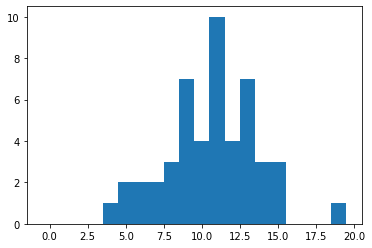

In [47]:
# YOUR CODE HERE
rate = 10
nsamples = 50
m = dist.Poisson(rate)
data = m.sample([nsamples])
xe = torch.arange(-.5,20.5,1)
plt.hist(data,xe);

### Problem 3.2

One of the awesome thing about PyTorch distributions is that they support broadcasting too. 

Construct a matrix `P` where `P[i,j]` equals $\mathrm{Pois}(x=j; \lambda=i)$ for $i=0,\ldots,4$ and $j=0,\ldots,4$.

Your answer should be,
```
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])
```

---

In [ ]:
# YOUR CODE HERE

i = torch.arange(0,5,1)
i = torch.reshape(i,(5,1))

j = torch.arange(0,5,1)
j = torch.reshape(j,(1,5))

LP = dist.Poisson(i).log_prob(j)
P = torch.exp(LP)
print(P)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])


### Problem 3.3

Evaluate the log probability of the points `[1.5, 3., 4.2]` under a gamma distribution with shape (aka concentration) 2.0 and inverse scale (aka rate) 1.5.

Your answer should be,

```
tensor([-1.0336, -2.5905, -4.0540])
```

---

In [ ]:
# YOUR CODE HERE
LP = dist.Gamma(2,1.5).log_prob([1.5, 3, 4.2])
print(LP)


tensor([-1.0336, -2.5905, -4.0540])


### Problem 3.4

Draw 1000 samples from a Poisson mixture model,

$$
\begin{align*}
p(x) &= \frac{1}{2} \mathrm{Pois}(10.0) + \frac{1}{2} \mathrm{Pois}(2.0)
\end{align*}
$$

Use `matplotlib.pyplot.hist` to plot a normalized histogram of the samples.

---

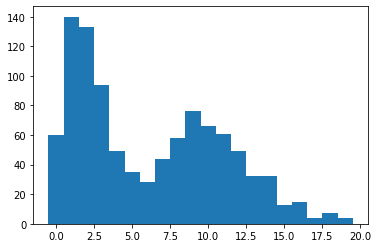

In [81]:
# YOUR CODE HERE

rates = torch.asarray([10.0, 2.0])
nsamples = 1000

cat = dist.Categorical(torch.asarray([.5, .5])) #equally wt dists
states = cat.sample(sample_shape=(nsamples,)) 
data = dist.Poisson(rates[states]).sample()
xe = torch.arange(-.5,20.5,1)
plt.hist(data,xe);



## 4. MAP estimation

### Problem 4.1

Let `data` be the samples from above. Assume there are $K = 2$ clusters and the prior cluster probabilities $[\tfrac{1}{2}, \tfrac{1}{2}]$ are known. Complete the code below to perform MAP estimation.

---


In [ ]:
def update_assignments(data, rates, probs):
    """Update the cluster assignments ($z$) given the data, rates, 
    and cluster probabilities.

    Args:
        data: shape `(N,)` tensor of counts
        rates: shape `(K,)` tensor of nonnegative rates for each cluster.
        probs: shape `(K,)` tensor of cluster probabilities
        
    Returns:
        assignments: shape `(N,)` tensor of integer cluster assignments
    """
    ##
    # YOUR CODE HERE
    ##
    return assignments

def update_rates(data, assignments, shape=1.0, inv_scale=1.0):
    """Update the rates for each cluster under a gamma prior.

    Args:
        data: shape `(N,)` tensor of counts
        assignments: shape `(N,)` tensor of integer cluster assignments
        shape: shape (aka concentration) of gamma prior. Defaults to 1.0.
        inv_scale: inverse scale (aka rate) of gamma prior. Defaults to 1.0.
        
    Returns:
        rates: shape `(K,)` tensor of updated rates for each cluster
    """
    ##
    # YOUR CODE HERE
    ##
    return rates
    

def log_joint(data, assignments, rates, probs, shape=1.0, inv_scale=1.0):
    """_summary_

    Args:
        data: shape `(N,)` tensor of counts
        assignments: shape `(N,)` tensor of integer cluster assignments
        rates: shape `(K,)` tensor of updated rates for each cluster
        probs: shape `(K,)` tensor of cluster probabilities
        shape: shape (aka concentration) of gamma prior. Defaults to 1.0.
        inv_scale: inverse scale (aka rate) of gamma prior. Defaults to 1.0.
        
    Returns:
        lp: scalar log joint probability under the mixture model
    """
    ###
    # YOUR CODE HERE
    ##
    return lp
    
# Run coordinate ascent for some number of iterations, starting
# with random cluster assignments
probs = torch.ones(2) / 2.0
assignments = torch.randint(0, 2, data.shape)
rates = 10 * torch.rand(2)

lps = []
for i in range(20):
    lps.append(log_joint(data, assignments, rates, probs))
    rates = update_rates(data, assignments)
    assignments = update_assignments(data, rates, probs)
    
plt.plot(lps)
plt.xlabel("iteration")
plt.ylabel("log joint probability")

print("estimated rates:", rates)

### Problem 4.2 (Bonus)

Now consider a more general model in which 

$$
z_n \sim \mathrm{Cat}(\boldsymbol{\pi})
$$

where the prior cluster probabilities $\boldsymbol{\pi}$ are unknown. (Above, we assumed they were known to be $\boldsymbol{\pi} = [\tfrac{1}{2}, \tfrac{1}{2}]$.) Derive and implement a coordinate ascent algorithm for MAP estimation of $\mathbf{z}_{\mathsf{MAP}}$, $\boldsymbol{\lambda}_{\mathsf{MAP}}$, and $\boldsymbol{\pi}_{\mathsf{MAP}}$.
